# Assignment

# Naive Bayes Classification

## 1. 직접 수식을 작성하여 Naive Bayes 모델을 만들겠습니다.

- 입력문서가 {fast, fly, shoot} 을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 장르로 분류가 될지 알아보겠습니다.
- 주어진 dataset 을 확인해 보기위해 엑셀 파일을 읽습니다.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
documents = pd.read_excel("/content/drive/MyDrive/ToBig's/week3/test_file.xlsx") 
documents

,label,message
0,comedy,"Fun couple, love love"
1,action,"fast Furious, shoot!!"
2,comedy,"couple^^, fly, fast, fun, fun"
3,action,"furious, shoot shoot fun"
4,action,"fly~~ fast shoot, Love"


### step 1. 단어를 모두 소문자로 바꾸어 줍니다. 
* message 칼럼에 있는 단어들을 모두 소문자로 바꿔주세요.

In [ ]:
lower_documents = [string.lower() for string in documents["message"]]

print(lower_documents)

['fun couple, love love', 'fast furious, shoot!!', 'couple^^, fly, fast, fun, fun', 'furious, shoot shoot fun', 'fly~~ fast shoot, love']


### step2. string.punctuation 을 이용해서 특수문자를 제거해주세요.
- string.punctuation 에는 특수문자들이 저장되어있는것을 확인할수 있습니다.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re

del_punctuation_documents = []

for words in lower_documents:
    new_string = ''.join([i for i in words if i not in string.punctuation])
    del_punctuation_documents.append(new_string)

print(del_punctuation_documents)

['fun couple love love', 'fast furious shoot', 'couple fly fast fun fun', 'furious shoot shoot fun', 'fly fast shoot love']


### step 3. 단어를 하나씩 띄어쓰기 단위로 쪼개어 줍니다.

In [ ]:
preprocessed_documents=[d.split(' ') for d in del_punctuation_documents]

print(preprocessed_documents)

[['fun', 'couple', 'love', 'love'], ['fast', 'furious', 'shoot'], ['couple', 'fly', 'fast', 'fun', 'fun'], ['furious', 'shoot', 'shoot', 'fun'], ['fly', 'fast', 'shoot', 'love']]


### step 4. 문자를 숫자로 변환해줍니다.
- 이를 위해 CountVectorizer를 사용합니다.
- CountVectorizer는 문서 집합에서 단어 토큰을 생성하고, 각 단어 수를 세어 BOW (Bag of Words) 인코딩한 벡터를 만들어줍니다.

- 문서에 해당단어가 몇번 포함되었는지를 나타낼 때 사용하는 방법입니다.

- 참고 : https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

![CountVectorized](https://user-images.githubusercontent.com/68625698/106378540-15d8ed80-63e9-11eb-8604-5c960c274867.PNG)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(documents['message'])

CountVectorizer()

In [ ]:
doc_array = count_vector.transform(documents['message']).toarray()
doc_array

array([[1, 0, 0, 1, 0, 2, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [1, 1, 1, 2, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 2],
       [0, 1, 1, 0, 0, 1, 1]])

In [ ]:
count_vector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['couple', 'fast', 'fly', 'fun', 'furious', 'love', 'shoot']

In [ ]:
# doc_array 배열에 순서에 따라 매치되는 단어를 나타낸다.
count_vector.vocabulary_

{'couple': 0,
 'fast': 1,
 'fly': 2,
 'fun': 3,
 'furious': 4,
 'love': 5,
 'shoot': 6}

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,couple,fast,fly,fun,furious,love,shoot
0,1,0,0,1,0,2,0
1,0,1,0,0,1,0,1
2,1,1,1,2,0,0,0
3,0,0,0,1,1,0,2
4,0,1,1,0,0,1,1


In [ ]:
frequency_matrix['count'] = frequency_matrix.sum(axis=1)
frequency_matrix

,couple,fast,fly,fun,furious,love,shoot,count
0,1,0,0,1,0,2,0,4
1,0,1,0,0,1,0,1,3
2,1,1,1,2,0,0,0,5
3,0,0,0,1,1,0,2,4
4,0,1,1,0,0,1,1,4


### step 5. 범주형 변수를 dummy변수로 변환해주는 작업(One-Hot Encoding!)을 해주어야합니다.
- label 을 comedy =1, action =0 으로 변환해주세요

In [ ]:
documents['label'] = documents['label'].map({'comedy': 1, 'action': 0})

In [ ]:
# documents['label'],frequency_matrix 결합
doc = pd.concat([documents['label'],frequency_matrix],axis=1)

In [ ]:
doc

,label,couple,fast,fly,fun,furious,love,shoot,count
0,1,1,0,0,1,0,2,0,4
1,0,0,1,0,0,1,0,1,3
2,1,1,1,1,2,0,0,0,5
3,0,0,0,0,1,1,0,2,4
4,0,0,1,1,0,0,1,1,4


###  step 6. 나이브 베이즈 계산을 해봅시다!

- 입력문서가 {fast, fly, shoot} 을 주요 단어로 가질때, 이 문서는 얼마의 확률로 어떤 장르로 분류가 될까요? (계산과정을 채워주세요) 

In [ ]:
doc = np.array(doc)      # dataframe을 np-array로 변환해줍니다.
                         # return값은 np-matrix가 아니라 np-array입니다.
doc

array([[1, 1, 0, 0, 1, 0, 2, 0, 4],
       [0, 0, 1, 0, 0, 1, 0, 1, 3],
       [1, 1, 1, 1, 2, 0, 0, 0, 5],
       [0, 0, 0, 0, 1, 1, 0, 2, 4],
       [0, 0, 1, 1, 0, 0, 1, 1, 4]])

In [ ]:
type(doc)

numpy.ndarray

####  P(Y=comedy), P(Y=action) 계산하기

In [ ]:
# P(Y=comedy)
p_comedy = sum(doc[:,0]==1) / len(doc)

# P(Y=action)
p_action = sum(doc[:,0]==0) / len(doc)

In [ ]:
print('p_comedy : ',p_comedy)
print('p_action : ', p_action)

p_comedy :  0.4
p_action :  0.6


#### P(fast=1|comedy=1), P(fly=1|comedy=1), P(shoot=1|comedy=1) 계산하기

* 문서에 두번 등장한 단어 주의
* 조건부 확률 계산식 참고 

In [ ]:
# P(fast=1|comedy=1)
p_comedy_fast = (sum(doc[(doc[:, 0] == 1) & (doc[:, 2] >= 1)][:, 2])) / sum(doc[doc[:, 0] == 1][:, -1])

# P(fly=1|comedy=1)
p_comedy_fly = (sum(doc[(doc[:, 0] == 1) & (doc[:, 3] >= 1)][:, 3])) / sum(doc[doc[:, 0] == 1][:, -1])

# P(shoot=1|comedy=1)
p_comedy_shoot = (sum(doc[(doc[:, 0] == 1) & (doc[:, 7] >= 1)][:, 7])) / sum(doc[doc[:, 0] == 1][:, -1])

In [ ]:
print('p_comedy_fast : ' , p_comedy_fast)
print('p_comedy_fly : ' , p_comedy_fly)
print('p_comedy_shoot : ' , p_comedy_shoot)   

p_comedy_fast :  0.1111111111111111
p_comedy_fly :  0.1111111111111111
p_comedy_shoot :  0.0


#### P(fast=1|action=1), P(fly=1|action=1), P(shoot=1|action=1) 계산하기

In [ ]:
# P(fast=1|action=1)
p_action_fast = (sum(doc[(doc[:, 0] == 0) & (doc[:, 2] >= 1)][:, 2])) / sum(doc[doc[:, 0] == 0][:, -1])
# P(fly=1|action=1)
p_action_fly = (sum(doc[(doc[:, 0] == 0) & (doc[:, 3] >= 1)][:, 3])) / sum(doc[doc[:, 0] == 0][:, -1])
# P(shoot=1|action=1)
p_action_shoot = (sum(doc[(doc[:, 0] == 0) & (doc[:, 7] >= 1)][:, 7])) / sum(doc[doc[:, 0] == 0][:, -1])

In [ ]:
print('p_action_fast : ' , p_action_fast)
print('p_action_fly : ' , p_action_fly)
print('p_action_shoot : ' , p_action_shoot)

p_action_fast :  0.18181818181818182
p_action_fly :  0.09090909090909091
p_action_shoot :  0.36363636363636365


#### P(Y = comedy| X = fast, fly, shoot) , P(Y = action=1| X = fast, fly, shoot) 값 계산하기

In [ ]:
#P(Y = comedy| X = fast, fly, shoot)
proba_comedy = p_comedy_fast*p_comedy_fly*p_comedy_shoot*p_comedy

#P(Y = action=1| X = fast, fly, shoot)
proba_action = p_action_fast*p_action_fly*p_action_shoot*p_action

In [ ]:
print('proba_comedy', proba_comedy)
print('proba_action', proba_action)

proba_comedy 0.0
proba_action 0.0036063110443275734


### step 7. 라플라스 스무딩
1. P(Y = comedy| X = fast, fly, shoot) => 0
2. P(Y = action| X = fast, fly, shoot) => 0.003606311044327574

- proba_comedy를 보면 p_comedy_shoot의 값인 0으로 인해 확률이 0으로 계산되었다는 것을 확인할 수 있습니다. 이 문제점을 해결해주세요.

In [ ]:
# P(fast=1|comedy=1)
p_comedy_fast_L =  (sum(doc[(doc[:, 0] == 1) & (doc[:, 2] >= 1)][:, 2]) + 1) / (sum(doc[doc[:, 0] == 1][:, -1]) + 7)

# P(fly=1|comedy=1)
p_comedy_fly_L =(sum(doc[(doc[:, 0] == 1) & (doc[:, 3] >= 1)][:, 3]) + 1) / (sum(doc[doc[:, 0] == 1][:, -1]) + 7)

# P(shoot=1|comedy=1)
p_comedy_shoot_L = (sum(doc[(doc[:, 0] == 1) & (doc[:, 7] >= 1)][:, 7]) + 1) / (sum(doc[doc[:, 0] == 1][:, -1]) + 7)

In [ ]:
print('p_comedy_fast_L : ' , p_comedy_fast_L)
print('p_comedy_fly_L : ' , p_comedy_fly_L)
print('p_comedy_shoot_L : ' , p_comedy_shoot_L)

p_comedy_fast_L :  0.125
p_comedy_fly_L :  0.125
p_comedy_shoot_L :  0.0625


In [ ]:
# P(fast=1|action=1)
p_action_fast_L = (sum(doc[(doc[:, 0] == 0) & (doc[:, 2] >= 1)][:, 2]) + 1) / (sum(doc[doc[:, 0] == 0][:, -1]) + 7)

# P(fly=1|action=1)
p_action_fly_L = (sum(doc[(doc[:, 0] == 0) & (doc[:, 3] >= 1)][:, 3]) + 1) / (sum(doc[doc[:, 0] == 0][:, -1]) + 7)
# P(shoot=1|action=1)
p_action_shoot_L =(sum(doc[(doc[:, 0] == 0) & (doc[:, 7] >= 1)][:, 7]) + 1) / (sum(doc[doc[:, 0] == 0][:, -1]) + 7)

In [ ]:
print('p_action_fast_L : ' , p_action_fast_L)
print('p_action_fly_L : ' , p_action_fly_L)
print('p_action_shoot_L : ' , p_action_shoot_L)

p_action_fast_L :  0.16666666666666666
p_action_fly_L :  0.1111111111111111
p_action_shoot_L :  0.2777777777777778


In [ ]:
#P(Y = comedy| X = fast, fly, shoot)
proba_comedy_L =  p_comedy_fast_L*p_comedy_fly_L*p_comedy_shoot_L*p_comedy

#P(Y = action=1| X = fast, fly, shoot)
proba_action_L = p_action_fast_L*p_action_fly_L*p_action_shoot_L*p_action


In [ ]:
print('proba_comedy_L : ', proba_comedy_L)
print('proba_action_L : ', proba_action_L)

proba_comedy_L :  0.000390625
proba_action_L :  0.0030864197530864196


### => 두개의 값을 비교하면 action 장르일 때 fast, fly, shoot 단어가 더 자주 나온다고 할 수 있다.

## 2. sklearn을 활용한 Naive Bayes Model
- 먼저 수업 시간에 활용했던 날씨와 온도 데이터를 활용해보겠습니다.

In [ ]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [ ]:
df = pd.DataFrame({'weather':weather, 'temperature':temp, 'play':play})
df

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


### step 1. 문자를 Label Encoding 해줍니다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

"""
라벨 인코더를 생성, fitting하여 
weather, temp, play 에 대해 라벨 인코딩 해주세요.
"""

le = LabelEncoder()

cols = ['weather', 'temperature', 'play']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

weather_encoded = df['weather'].values
temp_encoded = df['temperature'].values
label = df['play'].values
print("weather:", weather_encoded)
print("Temp:",temp_encoded)
print("Play:",label)

weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
features = list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


### step 2. sklearn의 Naive Bayes 모델인 MultinomialNB를 사용하여 예측하겠습니다.
- weather = 0(Overcast), temp = 2(Mild)인 경우 play = Yes로 예측됩니다.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# 라플라스 스무딩(alpha = 1)
model = MultinomialNB(alpha=1)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted) # 1: Yes

Predicted Value: [1]


### 이제 sklearn의 와인 데이터를 바탕으로 MultinomialNB를 활용하여 예측해주세요!
- train과 test 비율은 8:2로 해주세요.
- metrics는 accuracy로 진행해주세요.

In [ ]:
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
data=pd.concat([pd.DataFrame({'Labels':wine.target}),pd.DataFrame(wine.data, columns = wine.feature_names)], axis=1)
data

,Labels,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
from sklearn.model_selection import train_test_split

"""
X_train, X_test, y_train, y_test로 train_test_split 해주세요.
"""

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
"""
train data로 모델을 생성, 학습시켜주세요. 
"""

clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(y_pred)
print(y_test.values)


[0 2 1 0 1 1 0 2 1 1 0 2 0 1 2 1 0 0 1 0 1 0 1 1 2 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

"""
test data로, accuracy를 이용하여 성능을 확인해주세요.
"""
score=accuracy_score(y_true=y_test,y_pred=y_pred)


print("Accuracy:", score)

Accuracy: 0.9333333333333333


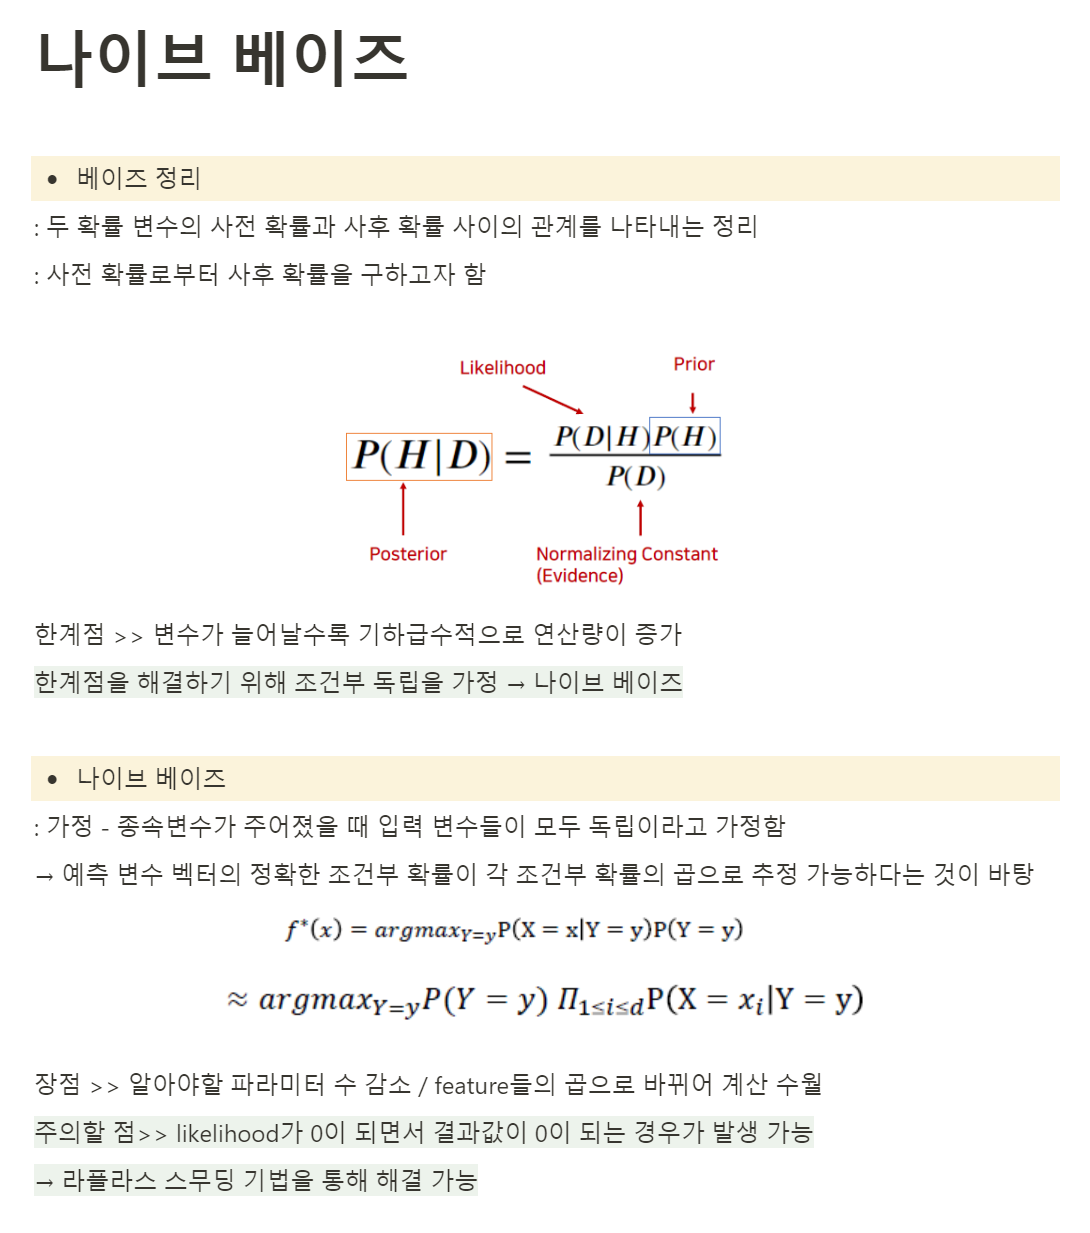

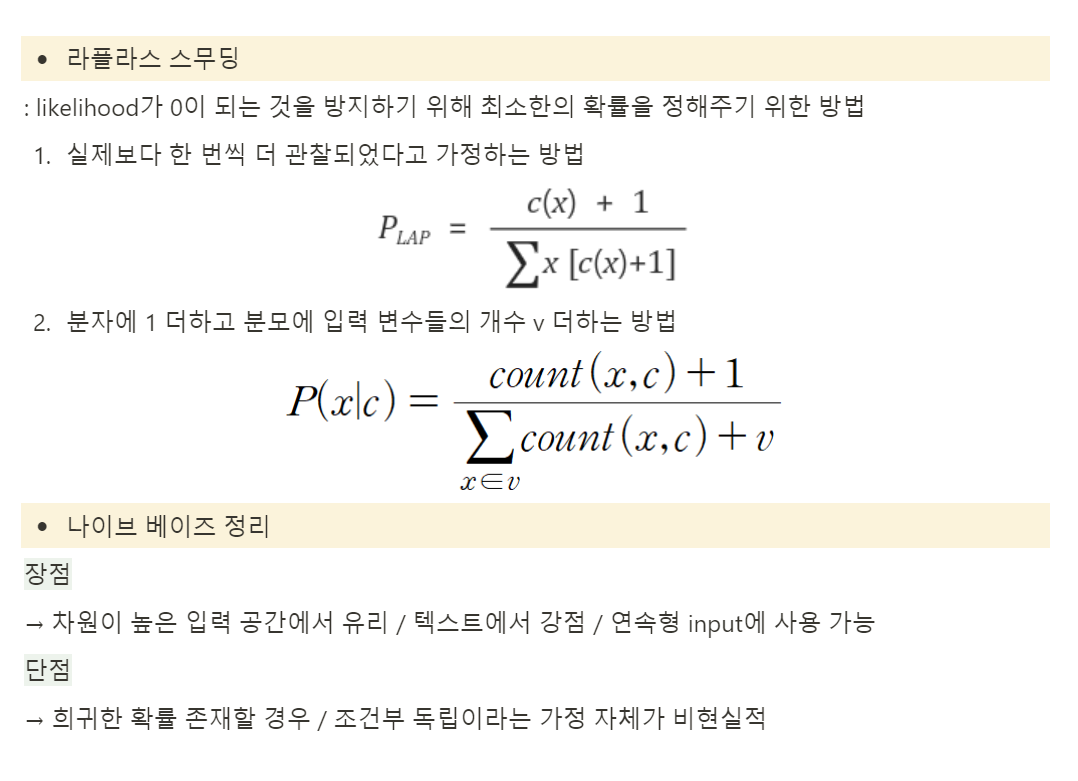